In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

def plotStock(name, year, std1_weight, std2_weight):
    stock_data = pd.read_csv("./data/%s.txt"%name, encoding = "cp950")
    stock_data = stock_data.tail(252*year)
    stock_data.index = stock_data['年月日'].apply(lambda the_day: datetime.datetime.strptime(str(the_day), "%Y%m%d"))

    Y = stock_data['收盤價'].values
    X = np.arange(len(Y))

    Y_reshape = Y.reshape(-1,1)  
    X_reshape = X.reshape(-1,1)

    from sklearn.linear_model import LinearRegression

    lm = LinearRegression()      ### 新的學生 沒計算過迴歸題目的學生
    lm.fit(X_reshape, Y_reshape)        ### 迴歸運算

    lm_line = np.arange(Y_reshape.size) * lm.coef_[0][0]  + lm.intercept_[0] 

    lm_line_add_1_std = lm_line + Y_reshape.std() * std1_weight
    lm_line_sub_1_std = lm_line - Y_reshape.std() * std1_weight
    lm_line_add_2_std = lm_line + Y_reshape.std() * std2_weight
    lm_line_sub_2_std = lm_line - Y_reshape.std() * std2_weight
    
    plt.figure(figsize=(15, 6))      ## 圖片大小
    plt.plot(Y_reshape, "black") ## 收盤價，  "black" 代表顏色是黑色
    plt.plot(lm_line, "brown") ## 趨勢線
    plt.plot(lm_line_add_1_std, "g") ## 相對樂觀線
    plt.plot(lm_line_sub_1_std, "g") ## 相對悲觀線
    plt.plot(lm_line_add_2_std, "r") ## 樂觀線
    plt.plot(lm_line_sub_2_std, "r") ## 悲觀線
    

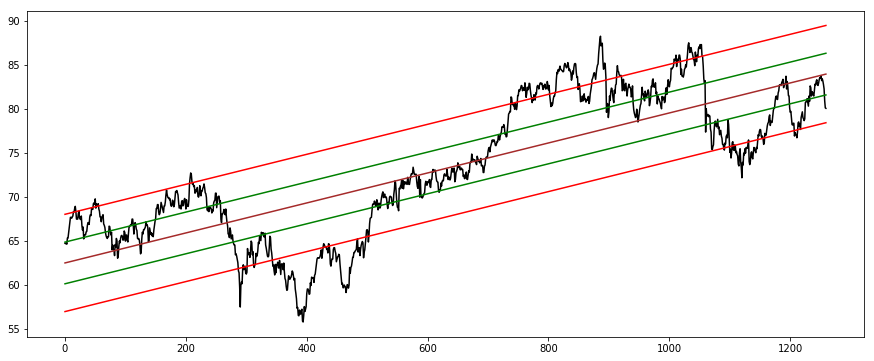

In [2]:
plotStock('0050', 5, 0.3, 0.7)